## Money in politics: Campaign contributions in the 2016 US Presidential Election.
#### Dr. Bruns

In this notebook we explore campaign contributions in the 2016 US presidential election.  The data set we use covers only up until the end of October, 2015.

We look into how contributions vary according to candidate, occupation, and employment status.  For example:
- How many contributions did the candidates get?  How much money did they get?
- Which candidates tended to get larger contributions?  For example, did some candidates get a small number of large contributions, while other candidates got a large number of small contributions?
- Do different occupations make different kinds of contributions?
- Do retired and unemployed people make smaller contributions?

Instructions:
- Problems 1-15 are shown in code cells below. Insert your code below the problem description.
- Do not make changes outside the problem cells.  
- The goal is to create plots that look like the ones provided in the model output.
- Be sure to include plot titles, labels, etc. as shown.
- Use a semicolon after the last plotting statement in a cell to suppress any text output from matplotlib.
- Run your notebook from top to bottom before submitting.

v1.4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy.stats import stats

In [2]:
rcParams['figure.figsize'] = 5.5,4
sns.set_theme(context='notebook', style='whitegrid')


### Read and preprocess the data

In [3]:


# This is a randomly-sampled subset of the full data set.
# df = pd.read_csv("https://raw.githubusercontent.com/grbruns/cst383/master/campaign-ca-2016-50K-sample.csv")

df = pd.read_csv("https://raw.githubusercontent.com/grbruns/cst383/master/campaign-ca-2016-50K-sample.csv", low_memory=False)

We will drop some variables for the purpose of this analysis.

In [4]:
df.drop(columns=['cmte_id', 'cand_id', 'contbr_st', 'contbr_zip', 'receipt_desc', 
                 'memo_cd', 'memo_text', 'form_tp', 'file_num', 'tran_id', 'election_tp'], inplace=True)
df.rename(columns={'cand_nm': 'candidate'}, inplace=True)

Create a ordinal variable from the contribution amount variable.

In [5]:
df['contb_receipt_range'] = pd.cut(df['contb_receipt_amt'], bins=(0, 25, 100, 20000), labels=['0 - 25', '25 - 100', '100+'])

Replace a long value that indicates a contributor did not provide a response.

In [6]:
df.replace('INFORMATION REQUESTED PER BEST EFFORTS', 'NOT PROVIDED', inplace=True)
df.replace('INFORMATION REQUESTED', 'NOT PROVIDED', inplace=True)

Remove candidates with less than 150 campaign contributions.

In [7]:
contbr_counts = df['candidate'].value_counts()
high_contbr_candidates = contbr_counts.index[contbr_counts >= 150]
df = df[df['candidate'].isin(high_contbr_candidates)]

Simplify candidate names

In [8]:
candidate_dict = {
    "Cruz, Rafael Edward 'Ted'": 'Ted Cruz',
    'Clinton, Hillary Rodham': 'Hillary Clinton',
    'Sanders, Bernard': 'Bernie Sanders',
    'Carson, Benjamin S.': 'Ben Carson',
    'Trump, Donald J.': 'Donald Trump',
    'Fiorina, Carly': 'Carly Fiorina',
    'Bush, Jeb': 'Jeb Bush',
    'Paul, Rand': 'Rand Paul',
    'Rubio, Marco': 'Marco Rubio',
    'Walker, Scott': 'Scott Walker',
    'Kasich, John R.': 'John Kasich'
}

df['candidate'] = df['candidate'].replace(candidate_dict)

### Initial exploration

Each row of the data set gives information about a single contribution.  A contributor may make multiple contributions to multiple candidates.

Some of the key variables:
- candidate is the candidate name
- contbr_* variables concern the contributor (name, employer, etc.)
- contb_* variables concern the contribution (receipt_amt is the dollar value of the contribution)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49349 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   candidate            49349 non-null  object  
 1   contbr_nm            49349 non-null  object  
 2   contbr_city          49349 non-null  object  
 3   contbr_employer      46524 non-null  object  
 4   contbr_occupation    48967 non-null  object  
 5   contb_receipt_amt    49349 non-null  float64 
 6   contb_receipt_dt     49349 non-null  object  
 7   contb_receipt_range  48773 non-null  category
dtypes: category(1), float64(1), object(6)
memory usage: 3.1+ MB


A few rows of the data.

In [10]:
df.head(3)

,candidate,contbr_nm,contbr_city,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,contb_receipt_range
0,Ted Cruz,"NELSON, SUZANNE MRS.",SAN LUIS OBISPO,RETIRED,RETIRED,2700.0,28-AUG-15,100+
1,Hillary Clinton,"PULIZZANO, JOSEPH",DALY CITY,NaN,RETIRED,25.0,05-AUG-15,0 - 25
2,Bernie Sanders,"DE CECCO, JORGE",UKIAH,NOT EMPLOYED,NOT EMPLOYED,100.0,16-JUL-15,25 - 100


What is the distribution of values in the new 'contb_receipt_range' variable?

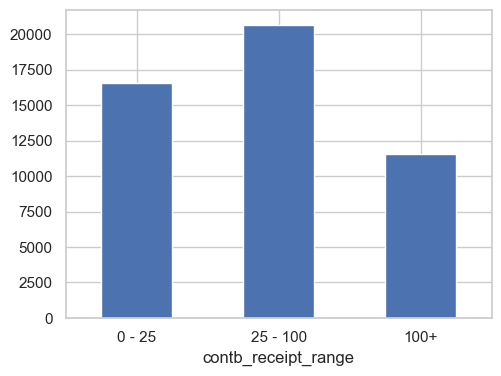

In [11]:
df['contb_receipt_range'].value_counts().sort_index().plot.bar(rot=0);

### Contributions by candidate

How many contributions did each candidate get?

**Problem 1**

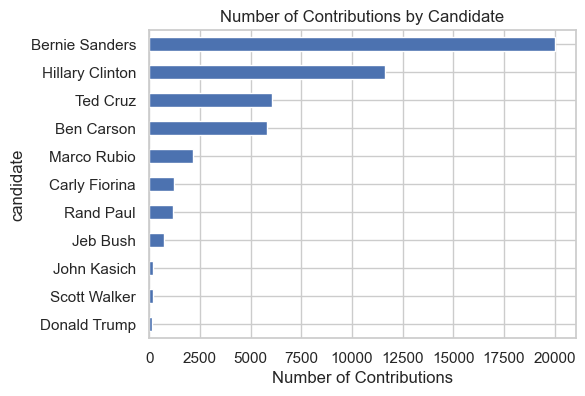

In [12]:
# Show the number of contributions by candidate using a horizontal barplot.  
#
# In this and all problems, try to recreate the model output, including titles and axis labels.
#
# Hint: use value_counts() and pandas barh() plot.  barh() is
# like bar() but horizontal.
df['candidate'].value_counts().sort_values().plot.barh()
plt.title('Number of Contributions by Candidate')
plt.xlabel('Number of Contributions');


Which candidates received the most money?

**Problem 2**

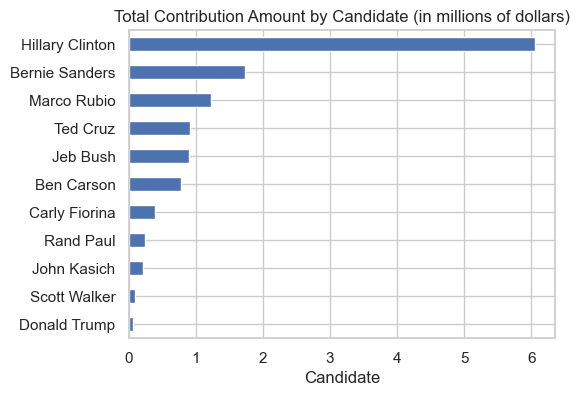

In [13]:
# Show the total contribution amount by candidate using a barplot.  
# Give the total amount in millions of dollars.
# Do not show a y axis label -- only the candidate names.
#
# Hint: use an aggregation command.
# Hint: an axis label can be suppressed by using the empty string as the label.
(df.groupby('candidate')['contb_receipt_amt'].sum() / 1000000).sort_values().plot.barh(title='Total Contribution Amount by Candidate (in millions of dollars)', xlabel='Candidate', ylabel='');



Although Sanders had almost twice as many contributions as Clinton, he had only about 1/3 of the total contribution amount that Clinon had.  It must be that Clintons contributions were larger, on average.

Let's look into the distribution of contribution sizes.

**Problem 3**

Text(0.5, 0, 'Contribution Amount ($)')

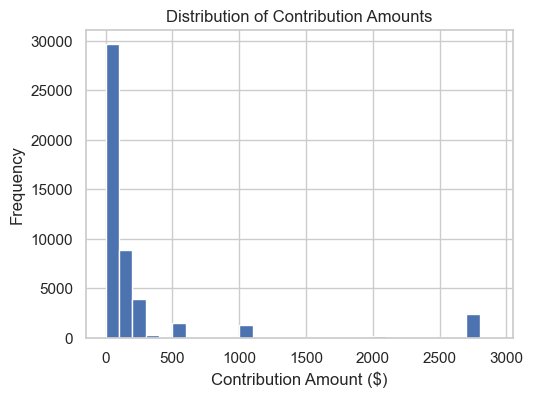

In [14]:
# Create a histogram showing contribution amounts.  Show
# contributions from 0 - 3000 dollars (inclusive) only.  Create 
# the histogram with Pandas.
#
# Hint: you will want to use the 'bins' parameter of histplot().
# Remember that the value of bins can be either a single integer
# giving the number of bins, or a list giving the location
# of the bin edges.  Look carefully at the plot to determine the
# 'bins' value you need

# You do not need to restrict the values provided to the histogram, only the bins.

df['contb_receipt_amt'].plot.hist(bins=range(0, 3000, 100))
plt.title('Distribution of Contribution Amounts')
plt.xlabel('Contribution Amount ($)')

It appears that most contributions are small.  Let's restrict our attention to an even smaller range of contributions to get a better idea of how small contributions are distributed.

What is the distribution of the contribution amounts?  There are a small number of very large amounts, which make it hard to display the distribution.  Also, there are some negative contribution amounts that seem to reflect returned contributions.  Therefore, let's focus on contributions ranging from 0 to 3,000 dollars.

**Problem 4**

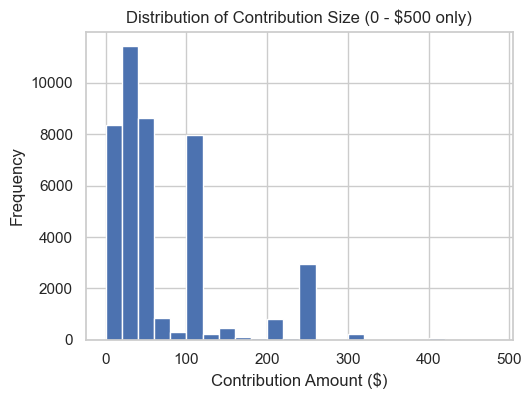

In [15]:
# Create a histogram showing contribution amounts.  Show
# contributions from 0 - 500 dollars only.  Create the
# Pandas.  Use bins of width 20.

df['contb_receipt_amt'].plot.hist(bins=range(0, 500, 20))
plt.title('Distribution of Contribution Size (0 - $500 only)')
plt.xlabel('Contribution Amount ($)');

\\$25, \\$50, \\$100, and \\$250 appear to be common contribution amounts.

**Problem 5**

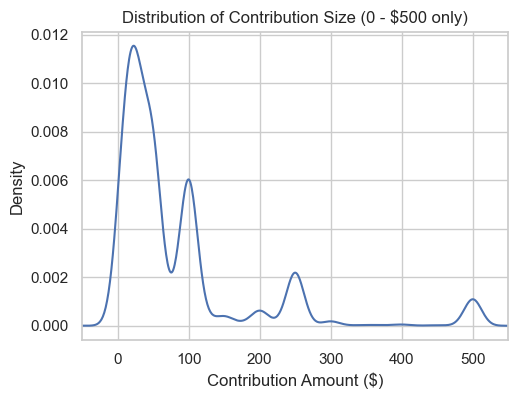

In [33]:
# Create a Pandas density plot (sometimes called a kernel density
# plot) showing contribution amounts.  Create the density plot
# using contributions from 0 - 500 dollars only.  
# Use a a limit of -50 to 550 on the x axis.
#
# Hint: Begin by creating a series containing the contb_receipt_amt values from 0-500.

(df[(df['contb_receipt_amt'] >= 0) & (df['contb_receipt_amt'] <= 500)]['contb_receipt_amt']
 .plot.density(xlim=(-50, 550)))

What about the distribution of contribution sizes by candidate?

**Problem 6**

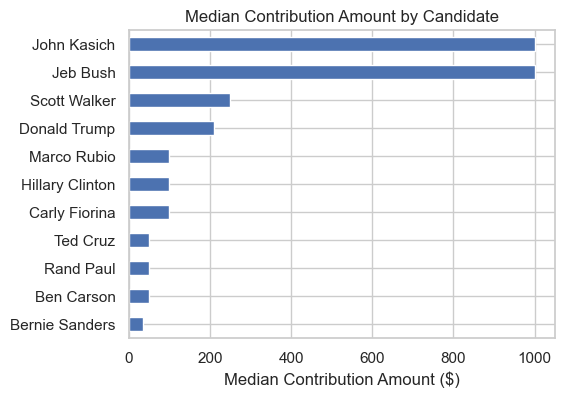

In [34]:
# Show the median contribution amount by candidate.
# Show only the 12 candidates with the highest median contribution.
# Do not show a y axis label -- only the candidate names.
#
# Hint: use groupby() and a Pandas bar plot.

(df.groupby('candidate')['contb_receipt_amt'].median()
 .sort_values()
 .iloc[:12]
 .plot.barh(title='Median Contribution Amount by Candidate', xlabel='Candidate', ylabel=''))


This tells us only about the median contribution size.  We can dive deeper into the distribution of contribution sizes by candidate.

**Problem 7**

Text(0.5, 0, '')

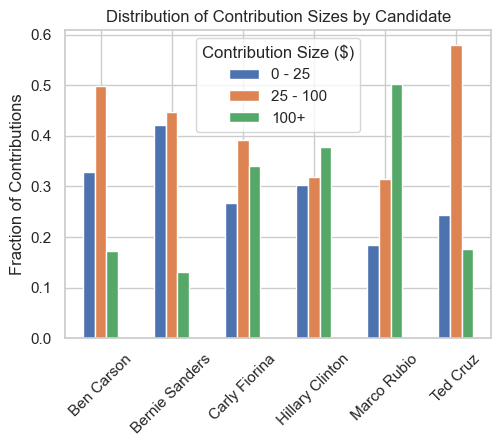

In [29]:
# Show the distribution of contribution sizes for the top 6 candidates,
# where by "top 6" I mean the 6 candidates with the greatest number of contributions.
# Use Pandas crosstab and a Pandas bar plot
#
# Hints: 
# Remember that you can rotate axis labels in a bar plot with the 'rot' parameter.
# The plt.legend() function has a 'title' argument.
ax = df.plot.bar(rot=45)
ax.legend(title='Contribution Size $', bbox_to_anchor=(1, 1))
ax.ylabel('Number of Contributions')
ax.title('Distribution of Contribution Sizes for Top 6 Candidates')


Sanders had the largest proportion of small contributions: about 42\% of his contributions were \$25 or less.  Rubio had the largest proportion of large contributions.

### Contributions by occupation

Which occupations are associated with the greatest number of contributions?  This will be interesting, but we need to keep in mind that the occupation with the greatest number of contributions might just be the most common occupation.

**Problem 8**

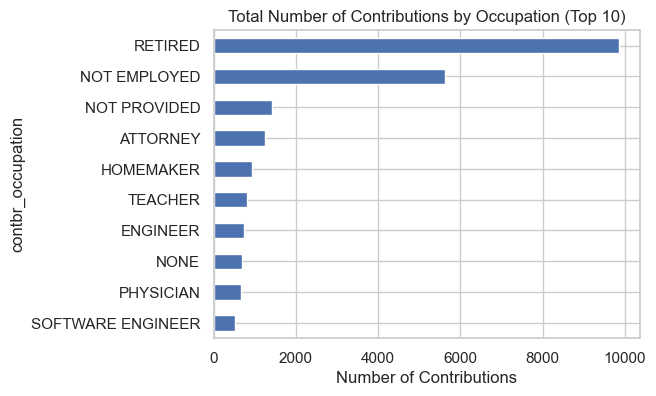

In [35]:
# Create a bar plot showing the total number of contributions by occupation, 
# for the 10 occupations with the largest number of contributions.  
# Use a Pandas bar plot.

df['contbr_occupation'].value_counts().sort_values(ascending=True).tail(10).plot.barh(
    title='Total Number of Contributions by Occupation (Top 10)'
).set_xlabel('Number of Contributions');

More contributions were made by retired people than those in other occupation categories.
We don't have data about the relative sizes of the occupation categories, so we can't say that retired people are more likely to make campaign contributions than, say, attorneys.

What about the size of contributions from different occupations?  Let's focus on a few occupations that contribute a lot.

**Problem 9**

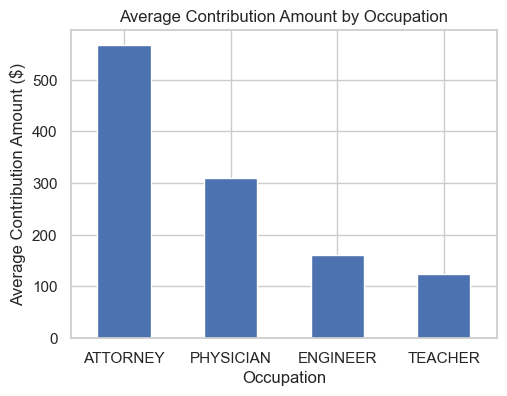

In [37]:
# Create a bar plot showing the average contribution amount
# for the occupations 'ATTORNEY', 'TEACHER', 'ENGINEER' and 'PHYSICIAN'.
# Include contributions of any amount.  Use Pandas to create the bar plot.
# Show the occupations in decreasing order of mean contribution amount.
#
# Hint: you may want to create a new data frame that is like df except
# that it only includes data associated with the four occupations.
# To do this, consider the Pandas method pd.Series.isin(). 

# YOUR CODE HERE

On average, attorneys contributed over \\$500, while teachers contributed about \\$120.

**Problem 10**

Text(0, 0.5, 'Percentage of Contributions')

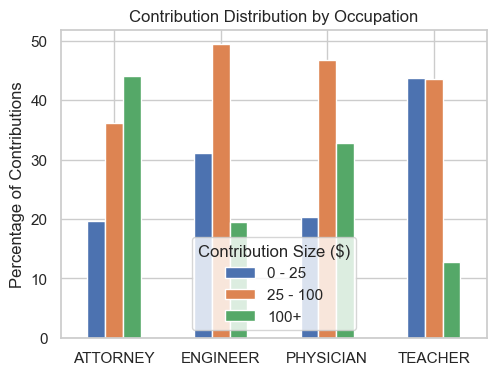

In [40]:
# Create a grouped bar plot showing the distribution of contributions
# for each of the four occupations of the previous plots.
# Use Pandas crosstab(), and don't forget about the 'normalize' argument.
#
# Be sure to use percentages in this plot, as shown in the model output.
#
# Hint: consider the 'title' and 'loc' arguments of plt.legend().

# YOUR CODE HERE

Attorneys and doctors tend to make larger contributions than teachers and engineers.  I believe attorneys and doctors earn more than teachers and engineers, so this is not surprising.

**Problem 11**

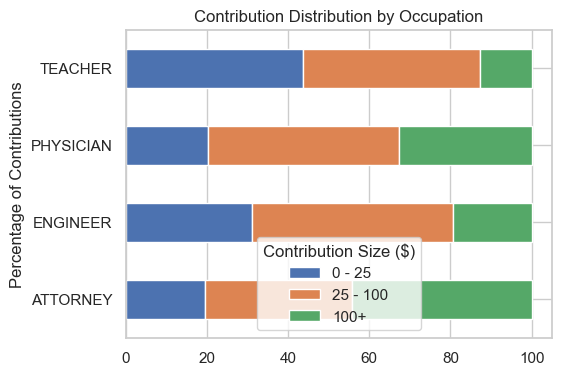

In [46]:
# Create a stacked bar plot showing the distribution of contributions
# for each of the four occupations of the previous plots.
# Use Pandas crosstab() and Pandas bar plot.
#
# Order the occupations in the plot in increasing order according to the
# percentage of contributions in the 100+ range.
#
# Be sure to use percentages in this plot, as shown in the model output.
#
# Hint: the code to put the legend to the side of the plot can be found
# in our 'plotting basics' slides.

# YOUR CODE HERE

### Contributions by candidates and occupations

Do people in different occupations tend to contribute to different candidates?  Let's look again at the same 4 occupations.

**Problem 12**

In [ ]:
# Create a bar plot showing the fraction of contributions for the
# top 5 candidates according to the contributor occupation.
# By "top 5 candidates" I mean the 5 candidates with the greatest number
# of contributions.
# Consider only the four occupations of the previous plots.
# Use Pandas crosstab() and plot.bar() to create the plot.
#
# Use no title in the legend.  Use the 'title' argument of plt.legend() to achieve this.
#
# Hint: Begin by creating a new data frame that is like df except that it
# it only contains rows related to the top 5 candidates and the 4 occupations.

# YOUR CODE HERE

We see that the contributions from attorneys strongly favor Clinton, while the contributions from engineers and teachers strongly favor Sanders.  Physicians are more balanced in the contributions.

### Contributions by employment status

We can classify contributors as either employed, unemployed, or retired.  Among these groups, which makes the most contributions?

**Problem 13**

In [ ]:
# Create a new variable "contbr_employment_status", derived from the 
# contbr_occupation column.  The value of employment_status should be
# "RETIRED" if the occupation is "RETIRED", 
# "NOT EMPLOYED" if the occupation is "NOT EMPLOYED", 
# and "EMPLOYED" otherwise.
# Show the number of contributions by employment status as a bar plot.
# 
# Hint: one way to create the new column of the data frame is like this:
# df['contbr_employment_status'] = df['contbr_occupation'].apply(emp_status)
# where emp_status is a function you create that takes as input a 
# contbr_occupation value and returns an employement status value. 

# YOUR CODE HERE

The number of contributions from employed people was more than from both retired and unemployed combined.

Do retired contributors tend to make smaller contributions than employed contributors?  It seems likely, but what does the data say?

**Problem 14**

In [ ]:
# Create a group bar plot showing the mean and median contribution
# amount for each employment status category.
# Remember that, with Pandas aggregate(), you can provide multiple aggregation function.
# Use a Pandas bar plot.

# YOUR CODE HERE

The mean and median contributions are smallest for unemployed people.  The difference between the groups is more pronounced for the mean value than the median.

### Contributions by candidate and occupation status

Do employed people and unemployed people tend to contribute to different candidates?  How about retired people?

**Problem 15**

In [ ]:
# Create a grouped bar plot showing the percentage of contributions
# (in number, not \\$ amount) for the top 5 candidates according to the 
# contributor employment status.
# Use Pandas crosstab() and plot.bar() to create the plot (not Seaborn).
#
# Use the 'normalize' argument of Pandas crosstab().

# YOUR CODE HERE

Almost all contributions from the unemployed went to Sanders.  Among the employed, Sanders had a slight lead over the other candidates.  Among the retired, Carson had a slight lead.